# Chapter 2. 캐글러 대상 설문조사 데이터 분석과 시각화

### 설문조사 응답 분석 1 - 데이터 사이언스 어떤 사람들이 할까요?

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('data/schema.csv')
question.shape

(290, 3)

In [3]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [4]:
mcq = pd.read_csv('data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [5]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [6]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

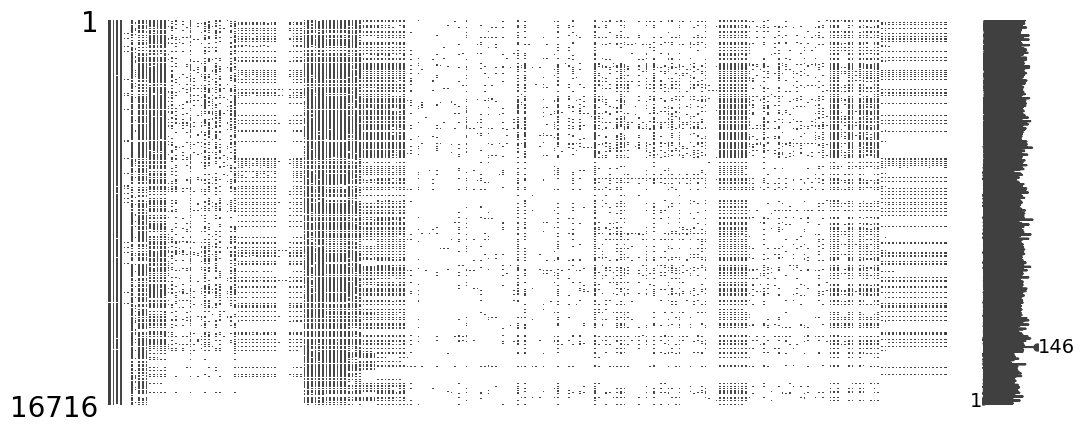

In [8]:
import missingno as msno

msno.matrix(mcq,figsize=(12,5))

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

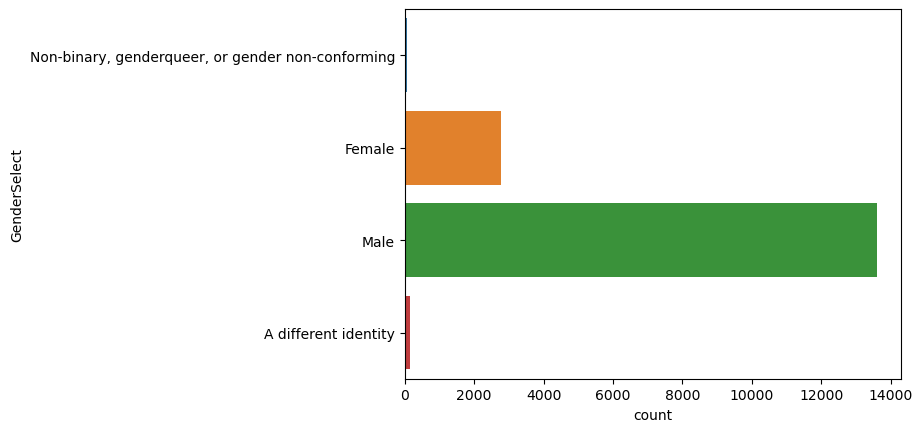

In [9]:
sns.countplot(y='GenderSelect', data=mcq)

In [10]:
con_df=pd.DataFrame(mcq['Country'].value_counts())
con_df['국가']=con_df.index
con_df.columns=['응답 수','국가']
con_df=con_df.reset_index().drop('index',axis=1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [11]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

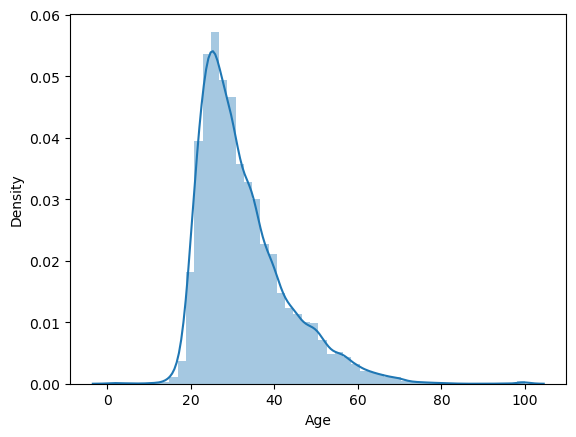

In [12]:
sns.distplot(mcq[mcq['Age']>0]['Age'])

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

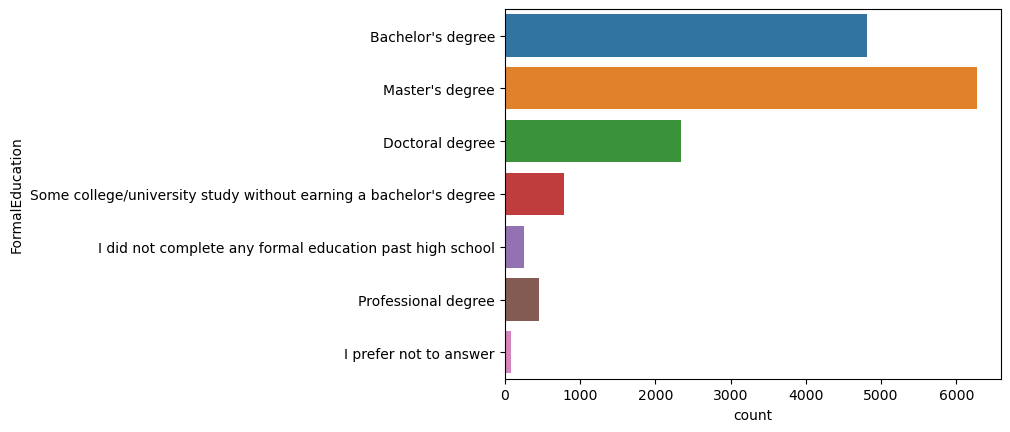

In [13]:
sns.countplot(y='FormalEducation', data=mcq)

In [14]:
pd.DataFrame(
    mcq['MajorSelect'].value_counts()
)

,MajorSelect
Computer Science,4397
Mathematics or statistics,2220
Engineering (non-computer focused),1339
Electrical Engineering,1303
Other,848
Physics,830
"Information technology, networking, or system administration",693
A social science,531
Biology,274
Management information systems,237


### 설문조사 응답 분석2 - 데이터 사이언스 공부 어떻게 시작해야 될까요?

In [15]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [17]:
mcq = pd.read_csv('data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

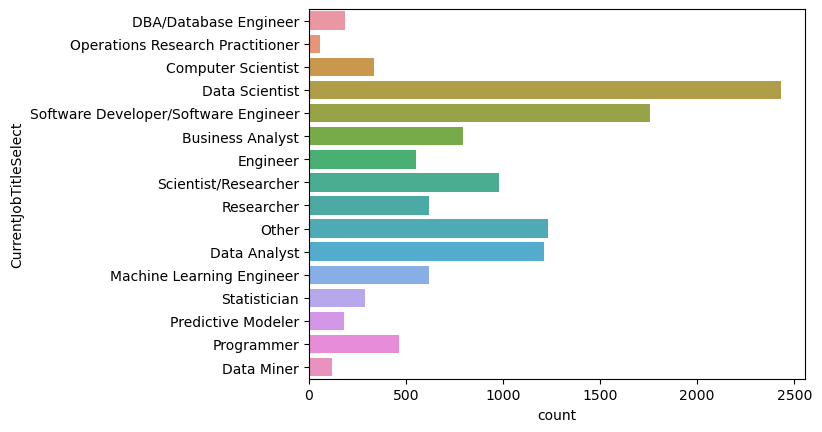

In [18]:
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [19]:
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

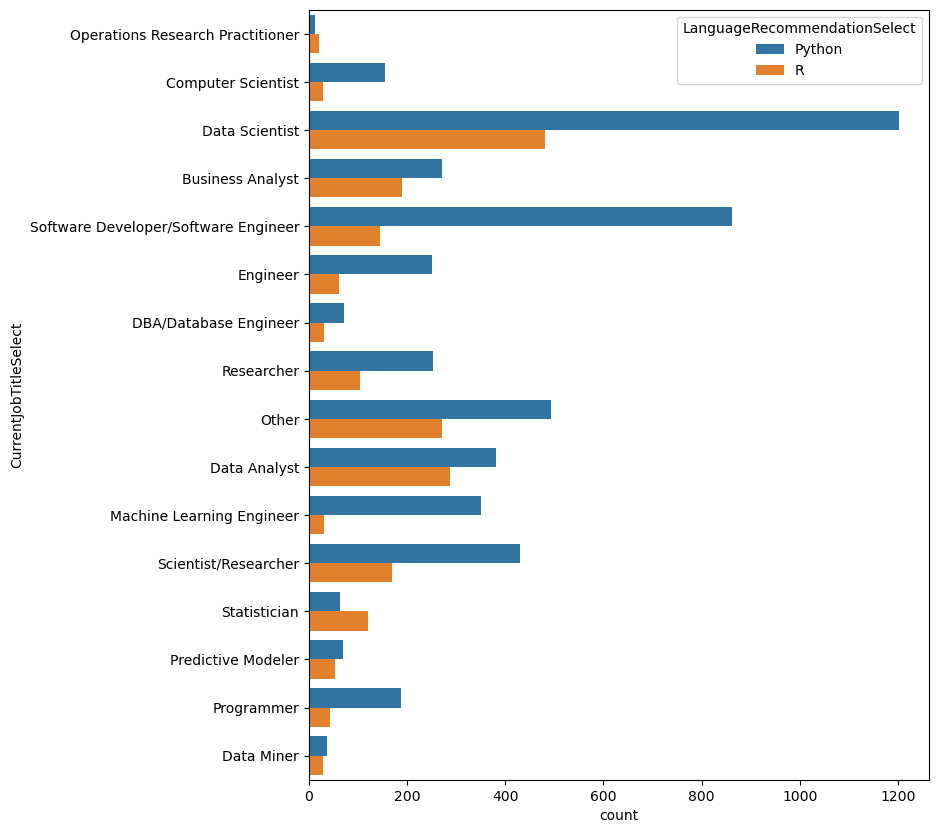

In [21]:
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect'] == 'Python') | (
        mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect', 
              hue='LanguageRecommendationSelect', 
              data=data)

In [22]:
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))

mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index=True, right_index=True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


<AxesSubplot:xlabel='MLToolNextYearSelect'>

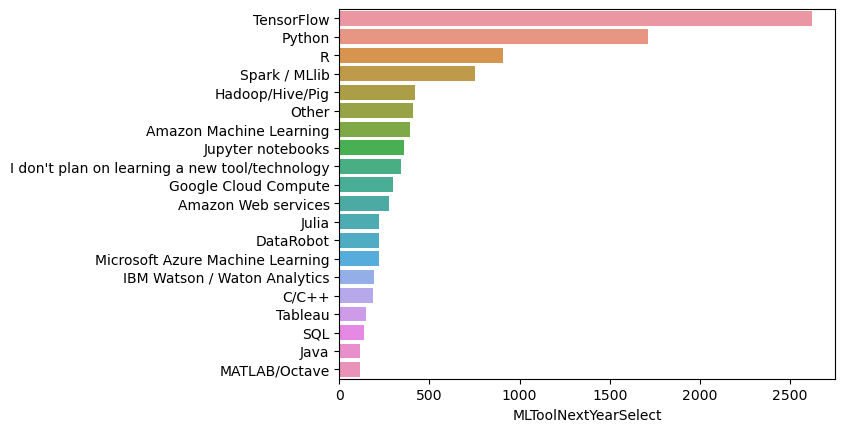

In [23]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

<AxesSubplot:xlabel='MLMethodNextYearSelect'>

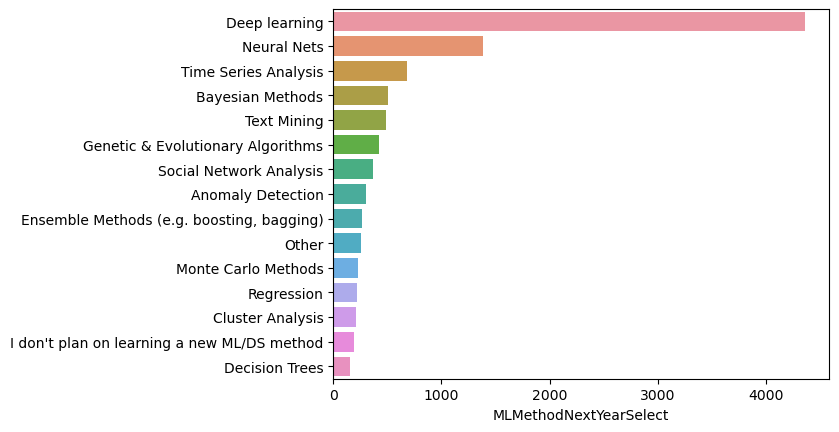

In [24]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [25]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

<AxesSubplot:xlabel='platform'>

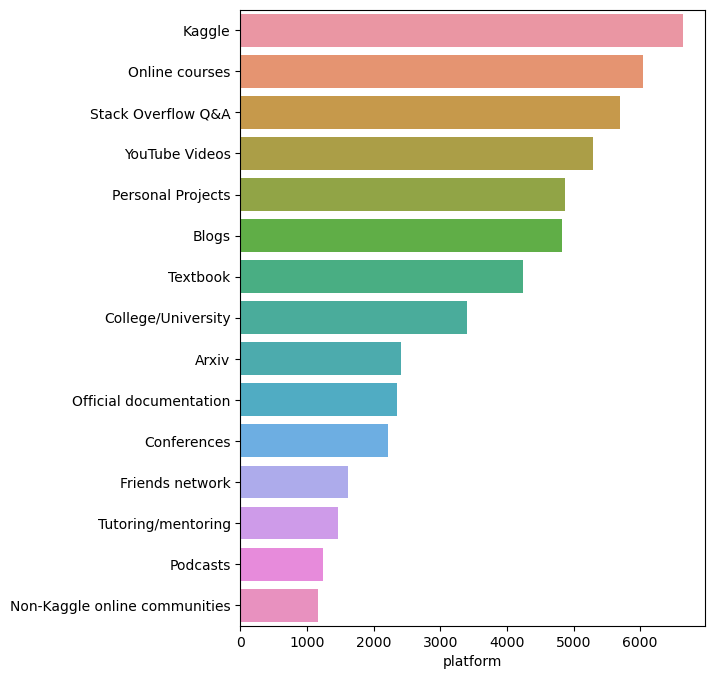

In [26]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [27]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [28]:
use_features = [x for x in mcq.columns if x.find(
    'LearningPlatformUsefulness') != -1]

<AxesSubplot:>

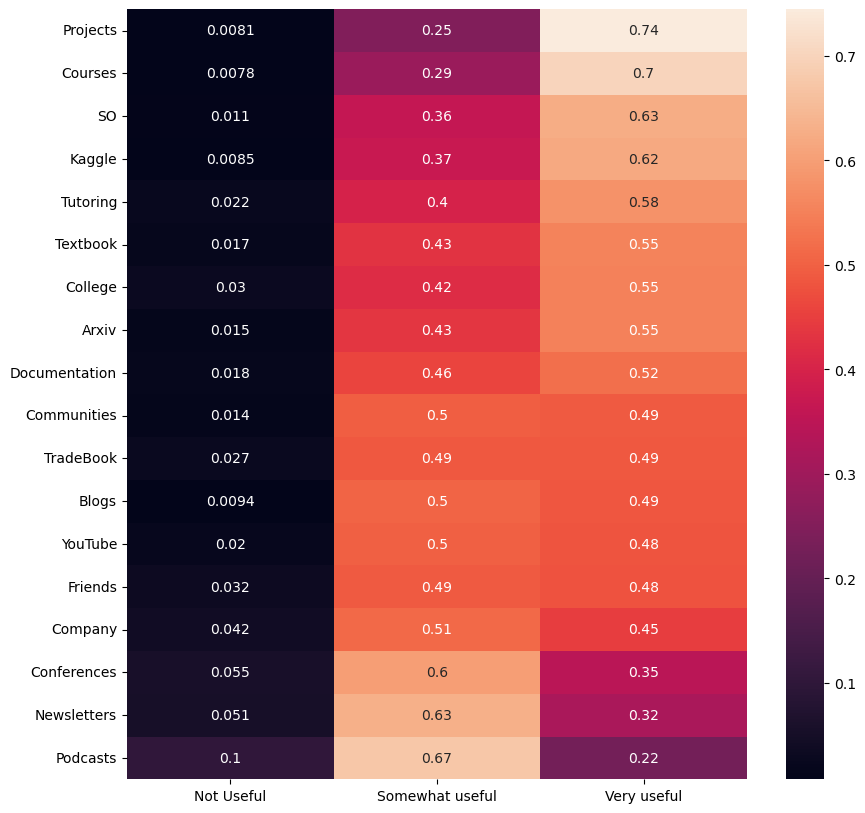

In [29]:
# 학습플랫폼과 유용함에 대한 연관성을 살펴본다.
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending=False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다.
plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values(
        "Very useful", ascending=False), annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Projects'),
  Text(1, 0, 'Courses'),
  Text(2, 0, 'SO'),
  Text(3, 0, 'Kaggle'),
  Text(4, 0, 'Tutoring'),
  Text(5, 0, 'Textbook'),
  Text(6, 0, 'College'),
  Text(7, 0, 'Arxiv'),
  Text(8, 0, 'Documentation'),
  Text(9, 0, 'Communities'),
  Text(10, 0, 'TradeBook'),
  Text(11, 0, 'Blogs'),
  Text(12, 0, 'YouTube'),
  Text(13, 0, 'Friends'),
  Text(14, 0, 'Company'),
  Text(15, 0, 'Conferences'),
  Text(16, 0, 'Newsletters'),
  Text(17, 0, 'Podcasts')])

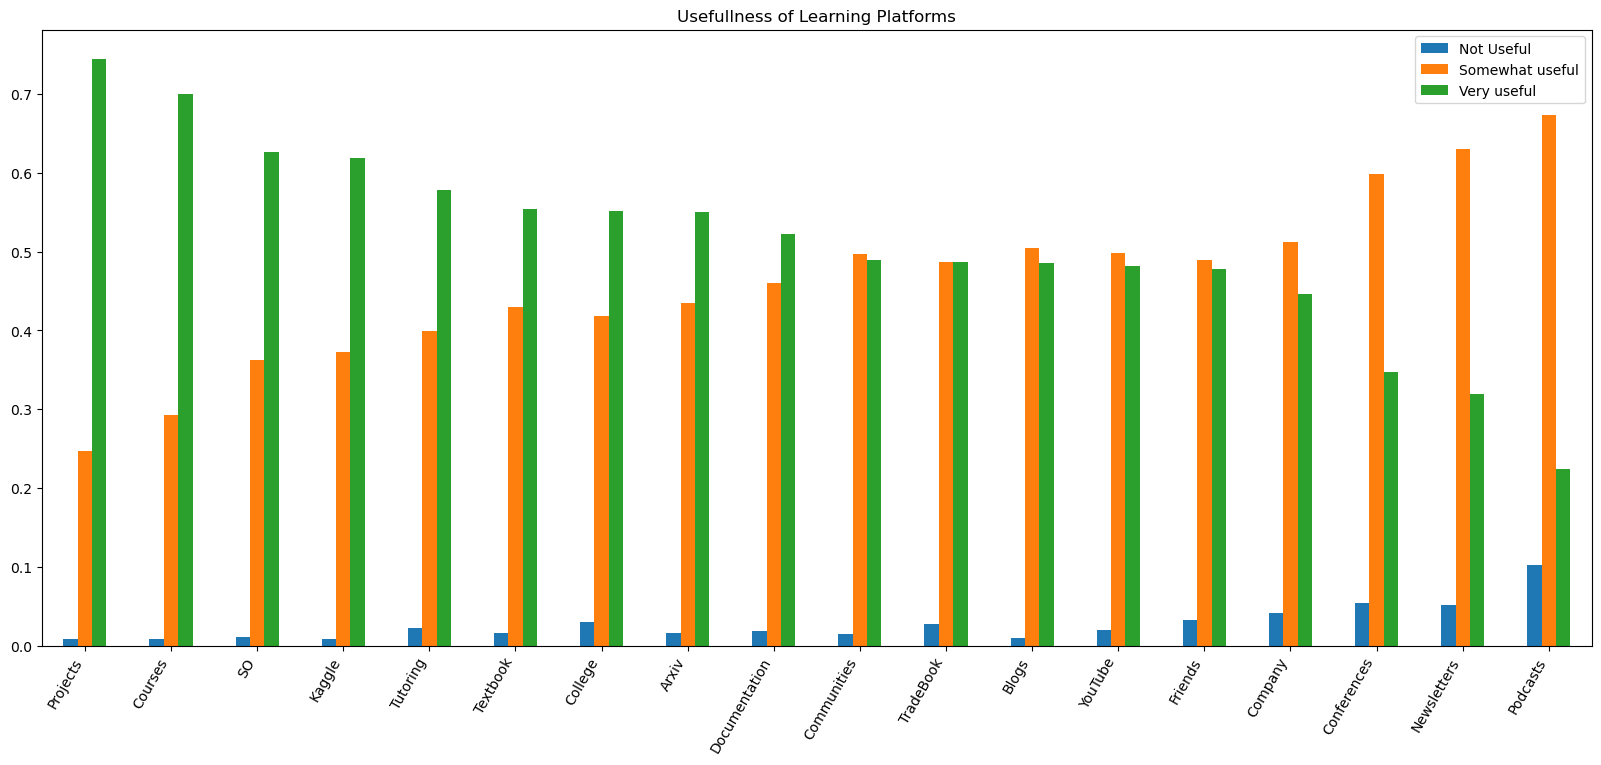

In [30]:
# 유용함의 정도를 각 플랫폼별로 그룹화 해서 본다.
fdf.plot(kind='bar', figsize=(20,8),
         title="Usefullness of Learning Platforms")
plt.xticks(rotation=60, ha='right')

In [31]:
cat_features = [x for x in mcq.columns if x.find(
    'LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [33]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# 파이차트를 그리기 위해 평균 값을 구해와서 담아준다.
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

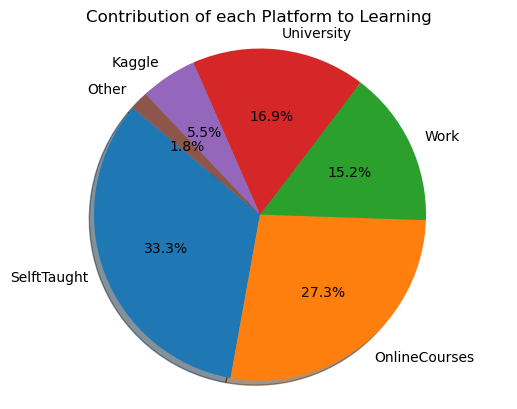

In [34]:
# 학습 플랫폼 별 도움이 되는 정도를 그려본다.
plt.pie(cdf, labels=cdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

In [35]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [36]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

(4206,)

In [37]:
mcq['HardwarePersonalProjectsSelect'
   ] = mcq['HardwarePersonalProjectsSelect'
          ].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: 
              pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [38]:
s = s[s != 'nan']

In [39]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Laptop + Cloud service (AWS,669
Azure,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


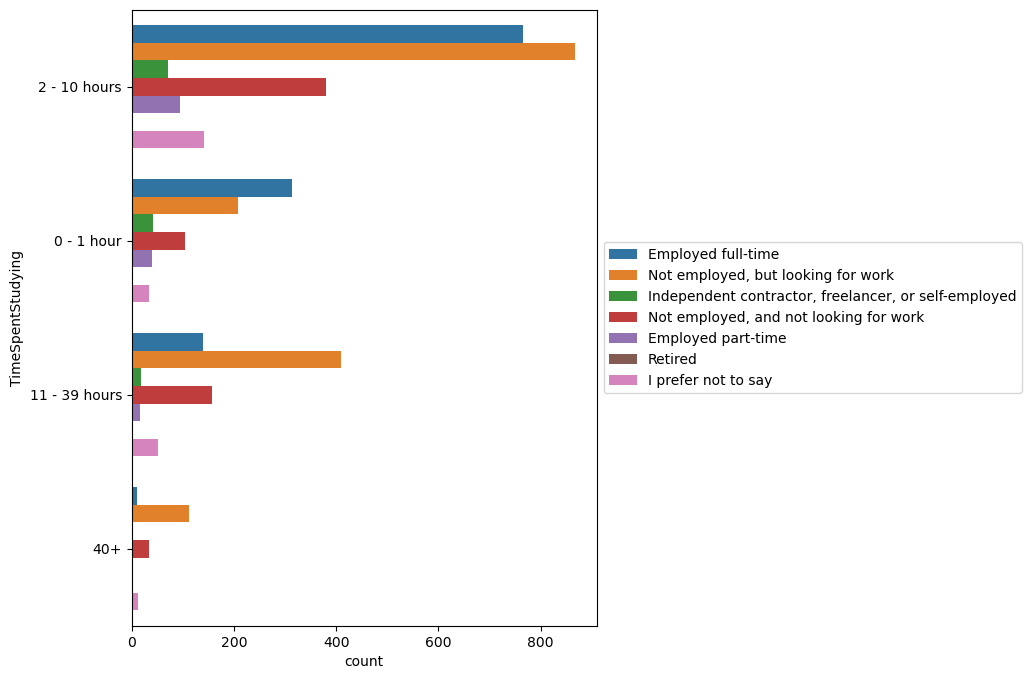

In [40]:
plt.figure(figsize=(6, 8))
sns.countplot(y='TimeSpentStudying', 
              data=mcq, 
              hue='EmploymentStatus'
             ).legend(loc='center left',
                      bbox_to_anchor=(1, 0.5))

In [41]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


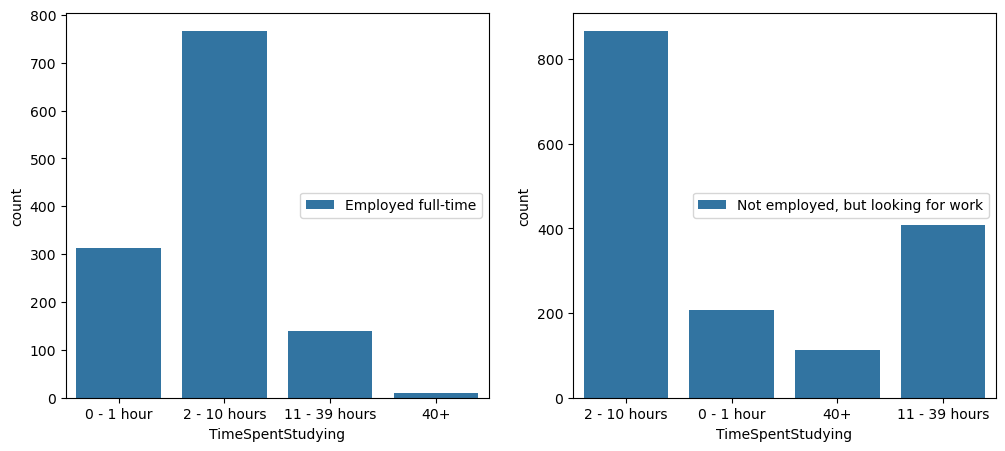

In [42]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying', 
              data=full_time, 
              hue='EmploymentStatus', ax=ax1
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying', 
              data=looking_for_job, 
              hue='EmploymentStatus', ax=ax2
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

### 설문조사 응답 분석3 - 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?

In [43]:
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

# 판다스로 선다형 객관식 문제에 대한 응답을 가져 옴
mcq = pd.read_csv('data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [44]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq[
    'BlogsPodcastsNewslettersSelect'
].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [45]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [46]:
s = s[s != 'nan'].value_counts().head(20)

<AxesSubplot:title={'center':'Most Popular Blogs and Podcasts'}, xlabel='platforms'>

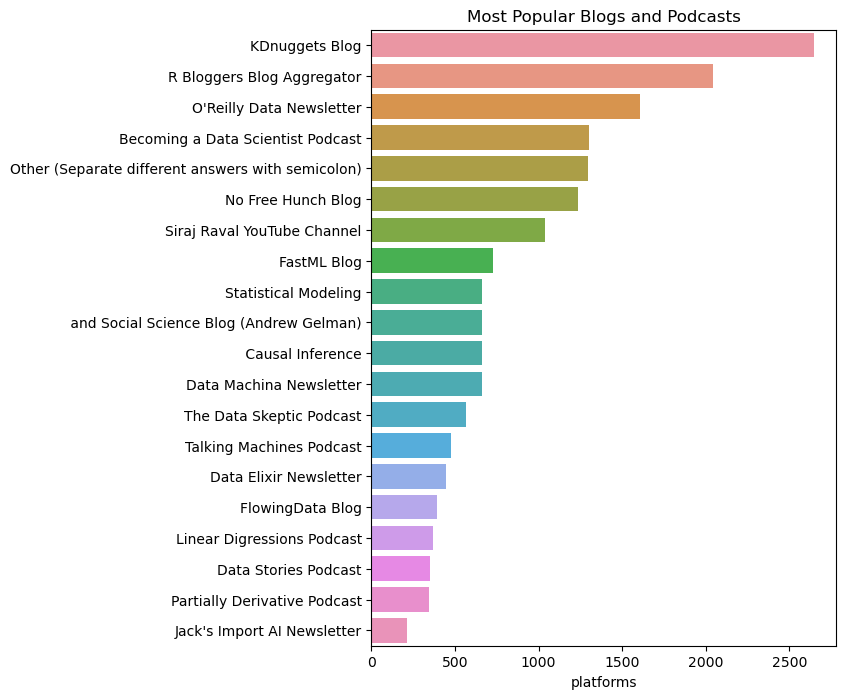

In [47]:
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

In [48]:
mcq['CoursePlatformSelect'] = mcq[
    'CoursePlatformSelect'].astype(
    'str').apply(lambda x: x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object